# 1.基础统计

In [29]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import re

# Task 1:

# 首先导入 metadata 和 reviewdata 数据：

In [1]:
import pandas as pd

# 读取 metadata JSON 文件
metadata = pd.read_json('./meta_CDs_and_Vinyl.json', lines=True)

# 读取 reviews JSON 文件
reviewdata = pd.read_json('./CDs_and_Vinyl_5.json', lines=True)

# 查看前5行
print(metadata.head(5))
print(reviewdata.head(5))

                                       category tech1  \
0                      [CDs & Vinyl, Christian]         
1  [CDs & Vinyl, Christian, Pop & Contemporary]         
2          [CDs & Vinyl, Christian, Children's]         
3          [CDs & Vinyl, Christian, Children's]         
4          [CDs & Vinyl, Christian, Children's]         

                                         description fit  \
0                                                 []       
1                                                 []       
2                                                 []       
3  [1) To God Be The Glory2) This Is My Fathers W...       
4  [Joy To The World 2 The First Noel 3 Hark! The...       

                                  title  \
0                Songs for the Shepherd   
1       Lift Him Up With Ron Kenoly VHS   
2                            I Love You   
3  Hymns: 16 Classic Hymns for Children   
4                      Christmas Carols   

                                     

# 处理metadata：

In [3]:
metadata.shape

(516914, 19)

In [5]:
#可能存在重复数据
metadata.asin.value_counts()

asin
B000053W7U    2
B000042O5N    2
B000042O1Y    2
B000042O2K    2
B000042O34    2
             ..
B0009UC7SO    1
B0009UCEZK    1
B0009UC7CK    1
B0009UC6OO    1
B01HJHLNIY    1
Name: count, Length: 412325, dtype: int64

In [7]:
#观察，同asin数据存在重复
metadata[metadata.asin=="B00002MNZS"]

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes,details
108492,"[CDs & Vinyl, Karaoke]",,[],,Songs of Grease,[],,Karaoke,[],"414,526 in CDs & Vinyl (","[B000071X52, B000LPS4D4, B00004TR2B]","<img src=""https://images-na.ssl-images-amazon....",,,$0.99,B00002MNZS,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,"{'Audio CD': '(February 19, 2007)', 'Number of..."
213081,"[CDs & Vinyl, Karaoke]",,[],,Songs of Grease,[],,Karaoke,[],"414,526 in CDs & Vinyl (","[B000071X52, B000LPS4D4, B00004TR2B]","<img src=""https://images-na.ssl-images-amazon....",,,$0.99,B00002MNZS,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,"{'Audio CD': '(February 19, 2007)', 'Number of..."


In [9]:
#删除重复行数据
metadata.drop_duplicates(subset=['asin'],inplace=True)

In [11]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412325 entries, 0 to 516913
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   category         412325 non-null  object
 1   tech1            412325 non-null  object
 2   description      412325 non-null  object
 3   fit              412325 non-null  object
 4   title            412325 non-null  object
 5   also_buy         412325 non-null  object
 6   tech2            412325 non-null  object
 7   brand            412325 non-null  object
 8   feature          412325 non-null  object
 9   rank             412325 non-null  object
 10  also_view        412325 non-null  object
 11  main_cat         412325 non-null  object
 12  similar_item     412325 non-null  object
 13  date             412325 non-null  object
 14  price            412325 non-null  object
 15  asin             412325 non-null  object
 16  imageURL         412325 non-null  object
 17  imageURLHighRes

# 处理reviewdata：

In [14]:
reviewdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1443755 entries, 0 to 1443754
Data columns (total 12 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   reviewerID      1443755 non-null  object
 1   asin            1443755 non-null  object
 2   reviewerName    1443702 non-null  object
 3   verified        1443755 non-null  bool  
 4   reviewText      1443475 non-null  object
 5   overall         1443755 non-null  int64 
 6   reviewTime      1443755 non-null  object
 7   summary         1443528 non-null  object
 8   unixReviewTime  1443755 non-null  int64 
 9   style           1388609 non-null  object
 10  vote            490113 non-null   object
 11  image           3713 non-null     object
dtypes: bool(1), int64(2), object(9)
memory usage: 122.5+ MB


根据输入的 asin 获取商品评论，我们可以创建一个函数来根据输入的 asin 查找商品，并返回该商品的所有评论.

In [25]:
def get_product_reviews(asin_code):
    # 首先从 reviewdata 中找到对应的评论数据
    product_reviews = reviewdata[reviewdata['asin'] == asin_code]
    
    # 如果找到评论数据，则返回
    if not product_reviews.empty:
        return product_reviews
    else:
        return "No reviews found for this product."

# 示例调用
asin_code = 'B000VZK7T8'  # 这里替换成你想查询的asin编码
product_reviews = get_product_reviews(asin_code)
print(product_reviews)

             reviewerID        asin        reviewerName  verified  \
715317    AX2IQHG1JRM7Y  B000VZK7T8              Iktomi     False   
715318   A393F3RLXH2VES  B000VZK7T8  Robert C. O. Gross      True   
715319   A1APPFIZ2QRC6E  B000VZK7T8     Amazon Customer      True   
715320   A1J87SYB3JPQWH  B000VZK7T8       Warren Harris      True   
715321   A3SXJHDPKBBBVU  B000VZK7T8     Amazon Customer     False   
...                 ...         ...                 ...       ...   
1339306   ADSGBJW5TMEY5  B000VZK7T8             pes@231      True   
1339307   AQHIN2O24FLYT  B000VZK7T8               Brian      True   
1339308  A3PKYUUT85UTVM  B000VZK7T8           big daddy      True   
1339309  A22E1DHDQLXKQU  B000VZK7T8              helena      True   
1339310  A2451Z1ZIFATYD  B000VZK7T8            Customer     False   

                                                reviewText  overall  \
715317   I remember when I first heard Smells Like Teen...        5   
715318                      C

演示示例，示例为0001388312.

In [16]:
#查看缺失值，reviewText有缺失
reviewdata.reviewText.isnull().sum()

280

In [19]:
#按asin（商品ID）将商品metadata和review联系起来 内连接可以删除没有对应评论的商品
all_data = metadata.merge(
    reviewdata,
    on=["asin"],
    how="inner"
)

In [20]:
#当输入商品编码后，可以加载该商品的所有评论
embedding = 'B000VZK7T8'
all_data[all_data.asin==embedding]['reviewText']

884194    I remember when I first heard Smells Like Teen...
884195                       Clear and crisp. Excellent LP.
884196                                                   OK
884197                                        Nirvana Rocks
884198                                            Essential
                                ...                        
885863                                                 cool
885864                  A classic album that started grunge
885865    This is the version of this album to buy, if y...
885866                                                 Good
885867                          Every time I listen to this
Name: reviewText, Length: 1674, dtype: object

# Task 2:

In [23]:
#查看title
all_data.title.value_counts()

title
<span id="parentalAdvisory" class="a-size-medium a-color-secondary a-text-normal"                                                                                                                                                                                                                                                                                                                                                                                                 52741
Greatest Hits                                                                                                                                                                                                                                                                                                                                                                                                                                                                      5739
<span class="a-size-medium a-color-secondary a-tex

In [42]:
def search_by_title(search_query):
    # 使用字符串匹配来查找包含搜索词的标题
    matching_products = metadata[metadata['title'].str.contains(search_query, case=False, na=False)]
    
    # 如果找到匹配的商品，则返回结果
    if not matching_products.empty:
        return matching_products
    else:
        return "No products found with the given title query."

In [46]:
# 示例调用
search_query = "Greatest Hits"  # 这里替换成你想搜索的关键词
matching_products = search_by_title(search_query)
print(matching_products)

                                                 category tech1  \
323                                    [CDs & Vinyl, Pop]         
446     [CDs & Vinyl, Alternative Rock, New Wave & Pos...         
527     [CDs & Vinyl, World Music, Europe, Scandinavia...         
612              [CDs & Vinyl, Dance & Electronic, Disco]         
615     [CDs & Vinyl, Rock, Progressive, Progressive R...         
...                                                   ...   ...   
515955             [CDs & Vinyl, Pop, Adult Contemporary]         
516002                                 [CDs & Vinyl, Pop]         
516419                                 [CDs & Vinyl, Pop]         
516725                              [CDs & Vinyl, Reggae]         
516727                             [CDs & Vinyl, Country]         

                                              description fit  \
323                                                    []       
446                                                    []       


# Task 3:

In [25]:
#查看一下价格的分布
all_data.price.value_counts()

price
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [31]:
#去除脏数据，填充为nan
def clean_price_data(row):
    if 0 >= len(row) :
        return np.nan
    elif row[0] != '$':
        return np.nan
    else :
        row = row.replace("$", "")
        row = row.replace(",", "")
        return np.floor(float(row))  #这里四舍五入
    
all_data['price'] = all_data['price'].apply(clean_price_data)

In [33]:
all_data['price']

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
           ... 
1296880    17.0
1296881    17.0
1296882    17.0
1296883    17.0
1296884    17.0
Name: price, Length: 1296885, dtype: float64

<Axes: ylabel='Frequency'>

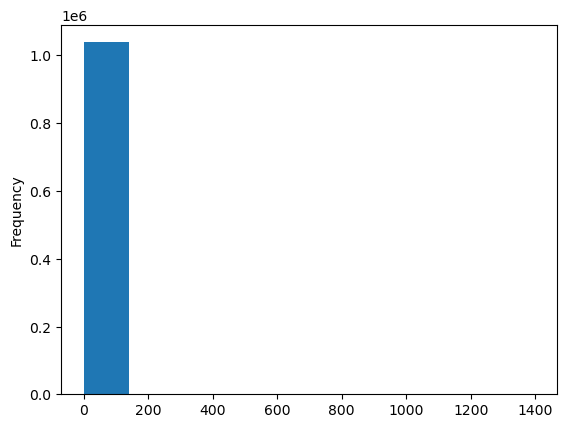

In [35]:
#画图，大部分小于500,边界不好确定
all_data.price.plot.hist()

<Axes: ylabel='Frequency'>

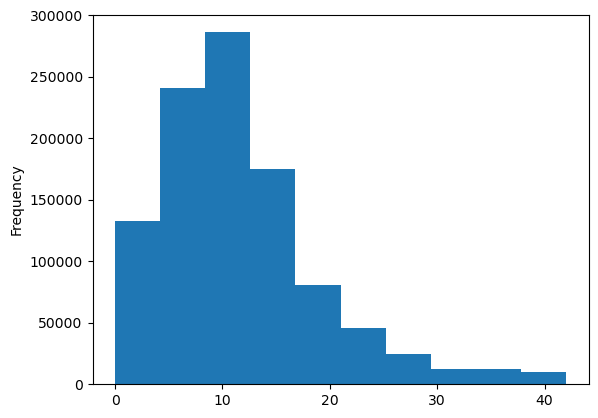

In [39]:
#以1美元为间隔单位，统计商品池价格分布的直方图
all_data[all_data.price<=42].price.plot.hist()

# Task 4:

In [52]:
#统计评价量
df = all_data.groupby('asin').agg(
        freq=("reviewText", "count"), 
    ).reset_index()
df

,asin,freq
0,0001393774,13
1,0005164885,140
2,0005465079,7
3,0739040251,5
4,0788602144,6
...,...,...
67597,B01HIDSULW,7
67598,B01HIE1OYQ,5
67599,B01HINXMPG,6
67600,B01HJDG28E,6


In [54]:
#评价量前100的商品
df.sort_values(by='freq',ascending =False).reset_index(drop=True)[:100]

,asin,freq
0,B000VZK7T8,1674
1,B00L98V4UW,1184
2,B000XGDO04,992
3,B000002IQ1,895
4,B000ZPPS0W,883
...,...,...
95,B000I9NGMM,341
96,B00000269M,341
97,B000002AGO,335
98,B00000FC5H,333


# Task 5:

In [59]:
#在CDs & Vinyl分类中的置为1，不在就置2
def deal_rank_data(row):   
    row = str(row)
    if "CDs & Vinyl" in row:
        return 1
    else : return 2

metadata['label'] = metadata['rank'].apply(deal_rank_data)

In [63]:
#获取数值进行排序,使用正则表达式剔除
CDs_Vinnyl_data  = metadata[metadata.label == 1]

def get_rank_data(row):   
    row = str(row)
    row = row.replace(",", "")
    #print(row)
    n = re.findall(r'(\d+) in CDs & Vinyl', row)
    return int(n[0])

CDs_Vinnyl_data['num'] = CDs_Vinnyl_data['rank'].apply(get_rank_data)

/var/folders/6s/8zty0sfx7_7fz3pxwclnfzfm0000gn/T/ipykernel_26835/1868281974.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CDs_Vinnyl_data['num'] = CDs_Vinnyl_data['rank'].apply(get_rank_data)


In [65]:
#选择销量前20的商品
CDs_Vinnyl_data.sort_values(by='num',ascending =True).reset_index(drop=True)[:20]

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,...,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes,details,label,num
0,"[CDs & Vinyl, Classical, Forms & Genres, Theat...","class=""a-keyvalue prodDetTable"" role=""present...",[Sing along symphonies by Beethoven's Wig are ...,,Beethoven's Wig: Sing Along Symphonies,"[B0001I2C8O, B000F1IPPQ, B001APM45I, B005HJAGQ...",,Rounder Records,"[Timeless classic, Great for the whole family,...","[>#67,988 in Office Products (See top 100), >#...",...,Office Products,,"March 5, 2002",$11.76,B000060OLA,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,{},1,4
1,"[CDs & Vinyl, Children's Music, Disney]","class=""a-keyvalue prodDetTable"" role=""present...","[GRAMMY winners, They Might Be Giants take a f...",,Here Comes Science,"[B000VDDCLK, B000BEZPSC, B015EC75CE, B0007D34I...",,Disney Sound,"[Great for any K-5 classroom, 2 disc set CD an...","[>#67,304 in Office Products (See top 100), >#...",...,Office Products,,"July 1, 2009",$15.74,B002FKZ4UO,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,{},1,7
2,"[CDs & Vinyl, Country]",,[&#34;His voice is just incredible...it's like...,,Traveller,"[B06XR8KLFF, B076FJT3PN, B000XPU63S, B00NWFE03...",,Chris Stapleton,[],17 in CDs & Vinyl (,...,"<img src=""https://images-na.ssl-images-amazon....",,,$9.99,B00SWBLS3C,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,"{'Audio CD': '(May 4, 2015)', 'Original Releas...",1,17
3,"[CDs & Vinyl, R&B, Contemporary R&B]",,[US version includes one exclusive 'hidden' bo...,,"<span id=""parentalAdvisory"" class=""a-size-medi...","[B004I1WIWU, B0149DCESE, B006ZWLXZ8, B0001XPZG...",,Amy Winehouse,[],27 in CDs & Vinyl (,...,"<img src=""https://images-na.ssl-images-amazon....",,,$14.99,B000RL2208,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,"{'Vinyl': '(June 19, 2007)', 'Original Release...",1,27
4,"[CDs & Vinyl, Children's Music, Disney]",,[The wait is finally over! The brand new Disne...,,Disney's Karaoke Series: Frozen,"[B01M7RS0PW, B005CA4F90, B000CCU7BS, B000XI6O2...",,Christophe Beck,[],38 in CDs & Vinyl (,...,"<img src=""https://images-na.ssl-images-amazon....",,,$8.70,B00IKM5N02,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,"{'Audio CD': '(April 15, 2014)', 'Original Rel...",1,38
5,"[CDs & Vinyl, Children's Music, Disney]","class=""a-keyvalue prodDetTable"" role=""present...","[Disney's collection of the best-loved, classi...",,Walt Disney Records Music CD Teaching Material...,"[B0018Q7K2Q, B000001M0V, B000001M1F, B000001M0...",,Walt Disney Records,[Full length CD with 30 classic Disney favorit...,"[>#95,174 in Office Products (See top 100), >#...",...,Office Products,,"May 2, 2008",,B0018Q7K2G,[],[],{},1,46
6,"[CDs & Vinyl, Children's Music, Lullabies]","class=""a-keyvalue prodDetTable"" role=""present...",[A Sing-A-Long and Lullabies soundtrack for th...,,Sing-A-Longs &amp; Lullabies for the Film Curi...,"[B0007GAEVW, B000GKZN9M, B00008NG5V, B001UREJU...",,Brushfire Records,"[Full length CD with 13 song collection, Relea...","[>#72,120 in Office Products (See top 100), >#...",...,Office Products,,"July 27, 2006",$2.98,B000CR7RDE,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,{},1,48
7,"[CDs & Vinyl, Soundtracks, Movie Scores]",,[GUARDIANS OF THE GALAXY AWESOME MIX VOL. 1 is...,,Guardians of the Galaxy: Awesome Mix Vol.1,"[B06XW4SNMD, B00IMQ7L6K, B071Z7GC61, B07629RLT...",,Soundtrack,[],53 in CDs & Vinyl (,...,"<img src=""https://images-na.ssl-images-amazon....",,,$10.92,B00KLF5J64,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,"{'Audio CD': '(July 29, 2014)', 'Original Rele...",1,53
8,"[CDs & Vinyl, Rock, Progressiv

# Task 6：

In [69]:
del metadata['label']

In [71]:
#将每个商品的平均评分（overall）添加到metadata的新一列
df = all_data.groupby('asin').agg(
        overall=("overall", "mean"), 
    ).reset_index()
metadata = metadata.merge(
    df,
    on=["asin"],
    how="left"
)
metadata

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes,details,overall
0,"[CDs & Vinyl, Christian]",,[],,Songs for the Shepherd,"[B0016CP2GS, B0000075PB, B0000275QQ, B00000I7J...",,Keith Green,[],"123,896 in CDs & Vinyl (","[B0016CP2GS, B00000I7JO, B00000I9AH, B00P826ZR...","<img src=""https://images-na.ssl-images-amazon....",,,,0001393774,[],[],NaN,4.846154
1,"[CDs & Vinyl, Christian, Pop & Contemporary]",,[],,Lift Him Up With Ron Kenoly VHS,"[6303908845, 6303646611, B000008GO1]",,,[],"284,935 in Movies & TV (",[B00000DUDE],Movies & TV,,,,0001501348,[],[],NaN,NaN
2,"[CDs & Vinyl, Christian, Children's]",,[],,I Love You,[],,Integrity Music,[],"1,138,833 in CDs & Vinyl (",[],"<img src=""https://images-na.ssl-images-amazon....",,,,0001515209,[],[],NaN,NaN
3,"[CDs & Vinyl, Christian, Children's]",,[1) To God Be The Glory2) This Is My Fathers W...,,Hymns: 16 Classic Hymns for Children,"[B00000DPLJ, B000008UPG, B00BQH9RKA, B00KYVHGR...",,Sue Gay,[],"271,064 in CDs & Vinyl (","[B00000DPLL, 0843113006, B00BQH9RKA, B000008UP...","<img src=""https://images-na.ssl-images-amazon....",,,.a-section.a-spacing-mini{margin-bottom:6px!im...,0005072298,[],[],NaN,NaN
4,"[CDs & Vinyl, Christian, Children's]",,[Joy To The World 2 The First Noel 3 Hark! The...,,Christmas Carols,"[B0010WAC50, B00000DPLJ]",,Cedarmont Kids,[],"409,293 in CDs & Vinyl (","[B00000DPKG, B0010WAC50, B00000DPKH, B00FSZPM8...","<img src=""https://images-na.ssl-images-amazon....",,,,0005121515,[],[],NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412320,"[CDs & Vinyl, Pop]",,[],,Furnaces,"[B07CBLRXNP, B01MYB68L4, B07BZBD1TY, B01MY7Z66...",,Ed Harcourt,[],"251,328 in CDs & Vinyl (","[B07JBYSQ63, B00B8ZOZ84, B0048IDRJQ, B00HVKMYY...","<img src=""https://images-na.ssl-images-amazon....",,,$9.79,B01HJ7FPAG,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,"{'Audio CD': '(August 26, 2016)', 'Number of D...",NaN
412321,"[CDs & Vinyl, Country]",,[CHARLIE DANIELS - NIGHTHAWK - CD],,Night Hawk,"[0718074963, B0012GMV5S, B00I89Y2SQ, B07H5VY3L...",,Charlie Daniels Band,[],"68,288 in CDs & Vinyl (","[B07H5VY3LK, B00FLV06V6, B00I89Y2SQ, B01JU6OYK...","<img src=""https://images-na.ssl-images-amazon....",,,$8.00,B01HJDG28E,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,"{'Audio CD': '(August 26, 2016)', 'Original Re...",5.000000
412322,"[CDs & Vinyl, Pop, Vocal Pop]",,[Five CD set containing a quintet of albums by...,,Original Album Classics,"[B00A7F17Z0, B00975L6O8, B00NMUCLBQ, B000002VE...",,Dionne Warwick,[],"69,386 in CDs & Vinyl (","[B00A7F17Z0, B0000032WJ, B00000IFVX, B00004SW9...","<img src=""https://images-na.ssl-images-amazon....",,,$14.56,B01HJG3UQI,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,"{'Audio CD': '(September 9, 2016)', 'Original ...",NaN
412323,"[CDs & Vinyl, Pop]",,[2016 five CD set containing a quintet of orig...,,Original Album Classics,"[B06Y1L22WT, B017CJL0BO, B005JS7VTQ, B01FJ2UKD...",,The Guess Who,[],"1,795 in CDs & Vinyl (","[B000CNE11O, B00000I0QI, B0042OZDP2, B0015XAT4...","<img src=""https://images-na.ssl-images-amazon....",,,$17.28,B01HJG3VZI,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,"{'Audio CD': '(September 9, 2016)', 'Original ...",4.705882


# Task 7:

In [73]:
Category_100 = CDs_Vinnyl_data.sort_values(by='num',ascending =True).reset_index(drop=True)[:100]
Category_100['category2'] = Category_100['category'].apply(lambda x: x[1])

In [76]:
data1 = pd.Series(Category_100['category2'].value_counts())

<Axes: >

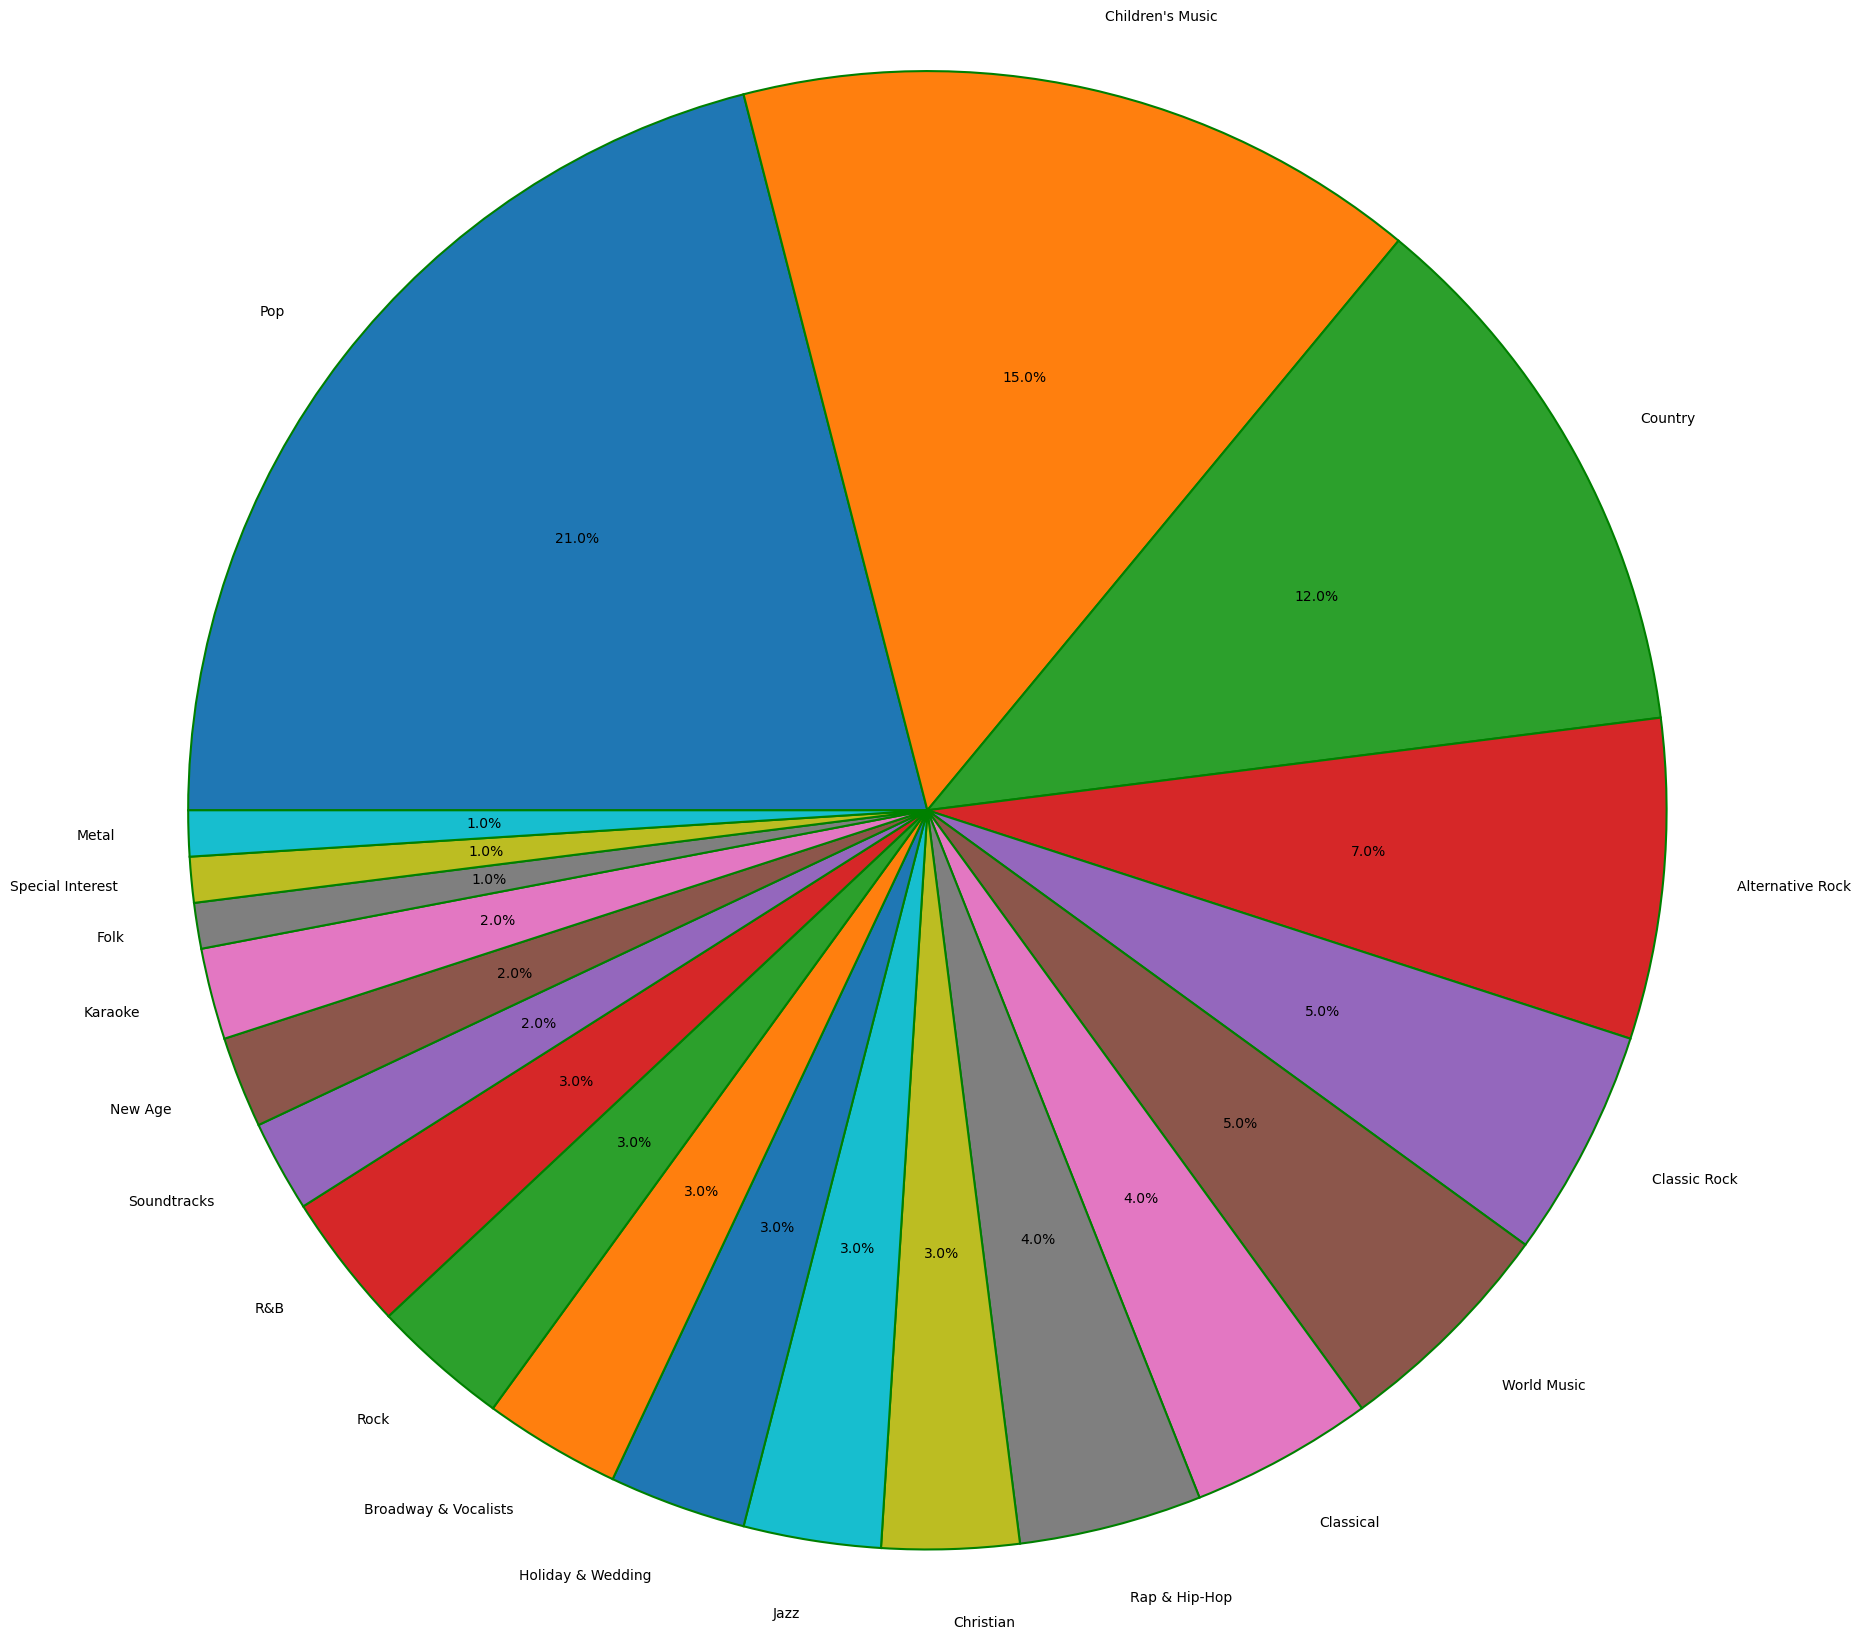

In [80]:
data1 = Category_100['category2'].value_counts()
# 将序列的名称设置为空字符，否则绘制的饼图左边会出现None这样的字眼
data1.name = ''
# 控制饼图为正圆
plt.axes(aspect = 'equal')
# plot方法对序列进行绘图
data1.plot(kind = 'pie',
         autopct='%.1f%%',
         radius = 5, 
         startangle = 180, 
         counterclock = False, 
         #title = 'piechart', 
         wedgeprops = {'linewidth': 1.5, 'edgecolor':'green'}, 
         textprops = {'fontsize':10, 'color':'black'} )

# 2.个体分析

# Task 1:

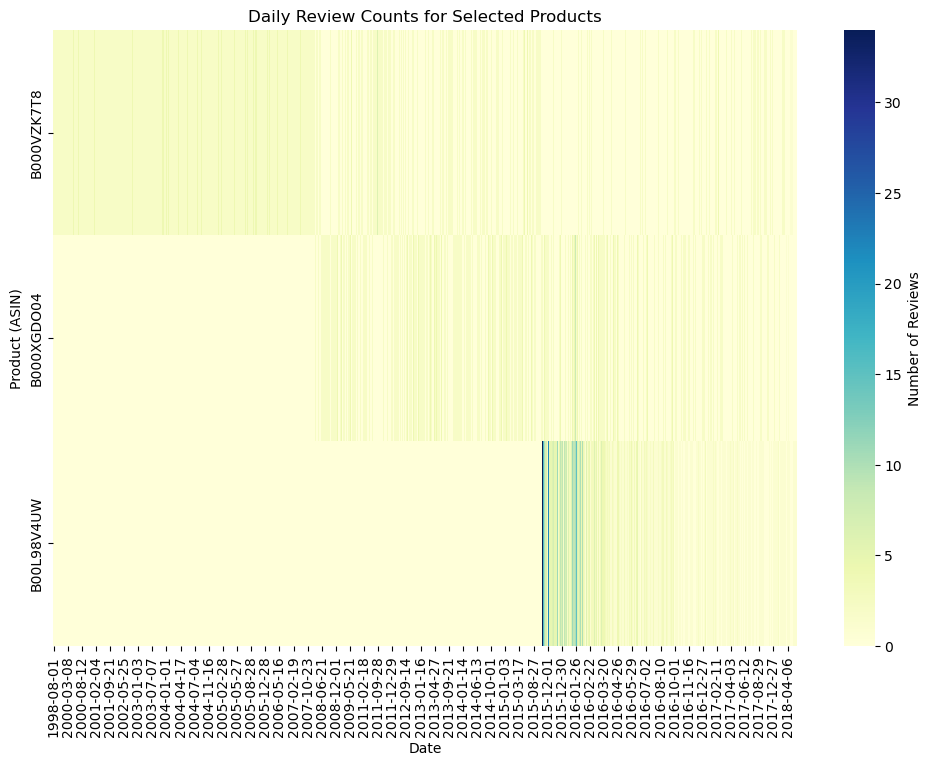

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 将 reviewTime 列转换为日期格式
reviewdata['reviewTime'] = pd.to_datetime(reviewdata['reviewTime'])

# 统计评论数量前10的商品
top_10_products = reviewdata['asin'].value_counts().head(10).index

# 选择前10商品中的三件商品
selected_products = top_10_products[:3]

# 过滤出这三件商品的评论数据
selected_reviews = reviewdata[reviewdata['asin'].isin(selected_products)].copy()

# 按天统计评论数量
daily_reviews = selected_reviews.groupby([selected_reviews['reviewTime'].dt.date, 'asin']).size().unstack(fill_value=0)

# 绘制热度图
plt.figure(figsize=(12, 8))
sns.heatmap(daily_reviews.T, cmap="YlGnBu", cbar_kws={'label': 'Number of Reviews'})
plt.xlabel('Date')
plt.ylabel('Product (ASIN)')
plt.title('Daily Review Counts for Selected Products')
plt.show()

# Task 2

In [98]:
reviewdata['style'] = reviewdata['style'].apply(lambda x: str(x) if isinstance(x, dict) else x)

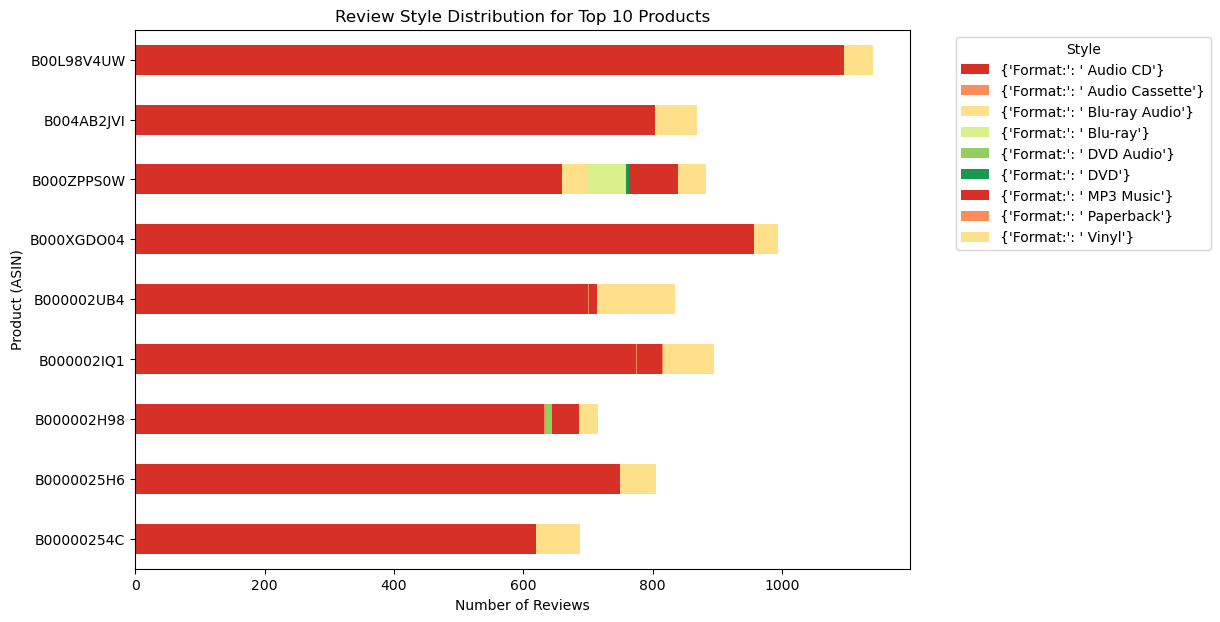

In [100]:
import pandas as pd
import matplotlib.pyplot as plt

# 假设 reviewdata 已经加载，并且其中有 'asin' 和 'style' 列
# 统计评论数量前10的商品
top_10_products = reviewdata['asin'].value_counts().head(10).index

# 过滤出前10个商品的评论数据
top_10_reviews = reviewdata[reviewdata['asin'].isin(top_10_products)]

# 按商品和评论Style统计
style_distribution = top_10_reviews.groupby(['asin', 'style']).size().unstack().fillna(0)

# 设置颜色映射
colors = ['#d73027', '#fc8d59', '#fee08b', '#d9ef8b', '#91cf60', '#1a9850']

# 绘制堆叠条形图
style_distribution.plot(kind='barh', stacked=True, figsize=(10, 7), color=colors)
plt.xlabel('Number of Reviews')
plt.ylabel('Product (ASIN)')
plt.title('Review Style Distribution for Top 10 Products')
plt.legend(title='Style', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

根据分数来显示

Index(['reviewerID', 'asin', 'reviewerName', 'verified', 'reviewText',
       'overall', 'reviewTime', 'summary', 'unixReviewTime', 'style', 'vote',
       'image'],
      dtype='object')


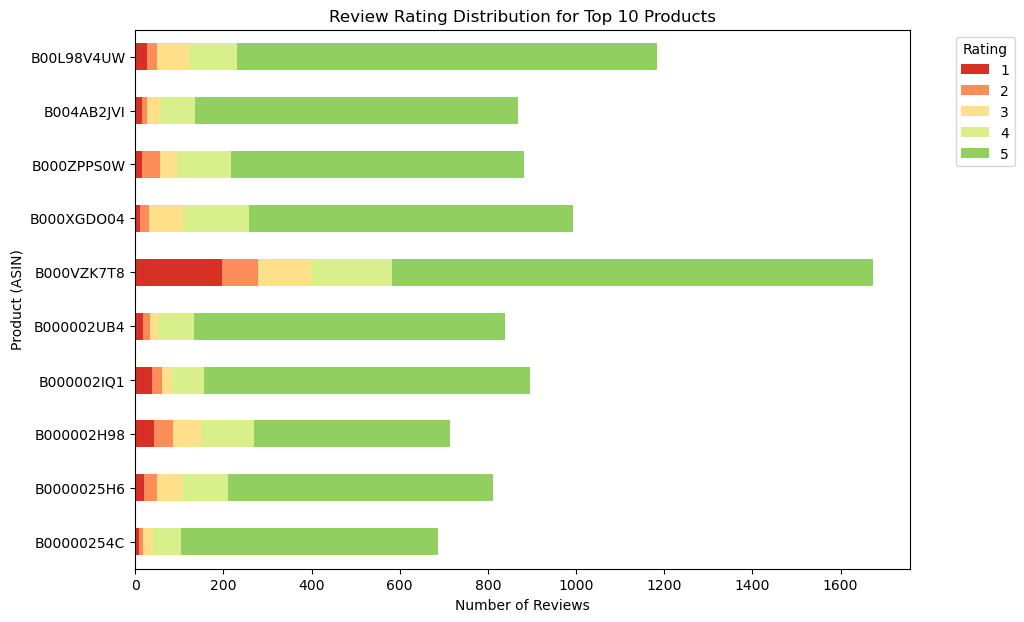

In [107]:
import pandas as pd
import matplotlib.pyplot as plt

# 检查你的数据集的列名以确认正确的评分列名
print(reviewdata.columns)  # 确认列名是否正确

# 假设 'overall' 是评分列的实际名称
# 统计评论数量前10的商品
top_10_products = reviewdata['asin'].value_counts().head(10).index

# 过滤出前10个商品的评论数据
top_10_reviews = reviewdata[reviewdata['asin'].isin(top_10_products)]

# 按商品和 overall 统计评论数量
rating_distribution = top_10_reviews.groupby(['asin', 'overall']).size().unstack().fillna(0)

# 设置颜色映射，与不同的评分等级对应
colors = ['#d73027', '#fc8d59', '#fee08b', '#d9ef8b', '#91cf60', '#1a9850']

# 绘制堆叠条形图
rating_distribution.plot(kind='barh', stacked=True, figsize=(10, 7), color=colors)
plt.xlabel('Number of Reviews')
plt.ylabel('Product (ASIN)')
plt.title('Review Rating Distribution for Top 10 Products')
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left', labels=['1', '2', '3', '4', '5'])
plt.show()

不同程度的肯定

Index(['reviewerID', 'asin', 'reviewerName', 'verified', 'reviewText',
       'overall', 'reviewTime', 'summary', 'unixReviewTime', 'style', 'vote',
       'image'],
      dtype='object')


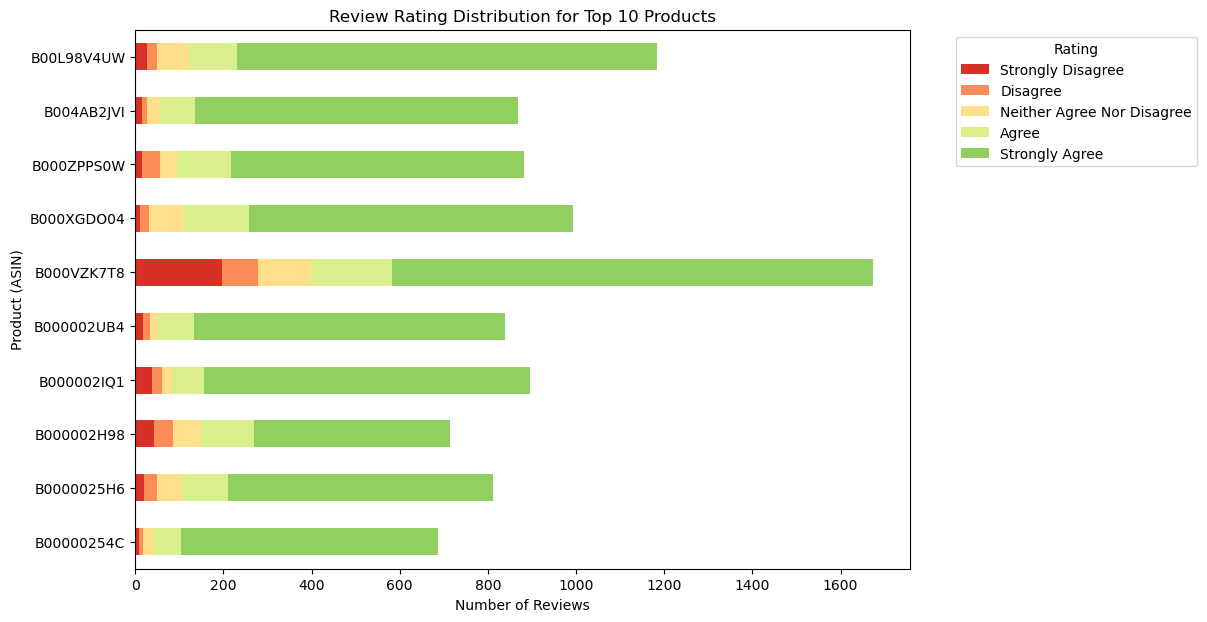

In [110]:
import pandas as pd
import matplotlib.pyplot as plt

# 检查你的数据集的列名以确认正确的评分列名
print(reviewdata.columns)  # 确认列名是否正确

# 假设 'overall' 是评分列的实际名称
# 统计评论数量前10的商品
top_10_products = reviewdata['asin'].value_counts().head(10).index

# 过滤出前10个商品的评论数据
top_10_reviews = reviewdata[reviewdata['asin'].isin(top_10_products)]

# 按商品和 overall 统计评论数量
rating_distribution = top_10_reviews.groupby(['asin', 'overall']).size().unstack().fillna(0)

# 设置颜色映射，与不同的评分等级对应
colors = ['#d73027', '#fc8d59', '#fee08b', '#d9ef8b', '#91cf60', '#1a9850']

# 绘制堆叠条形图
rating_distribution.plot(kind='barh', stacked=True, figsize=(10, 7), color=colors)
plt.xlabel('Number of Reviews')
plt.ylabel('Product (ASIN)')
plt.title('Review Rating Distribution for Top 10 Products')
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left', labels=[
    'Strongly Disagree',  # 1
    'Disagree',           # 2
    'Neither Agree Nor Disagree',  # 3
    'Agree',              # 4
    'Strongly Agree'      # 5
])
plt.show()

# Task 3

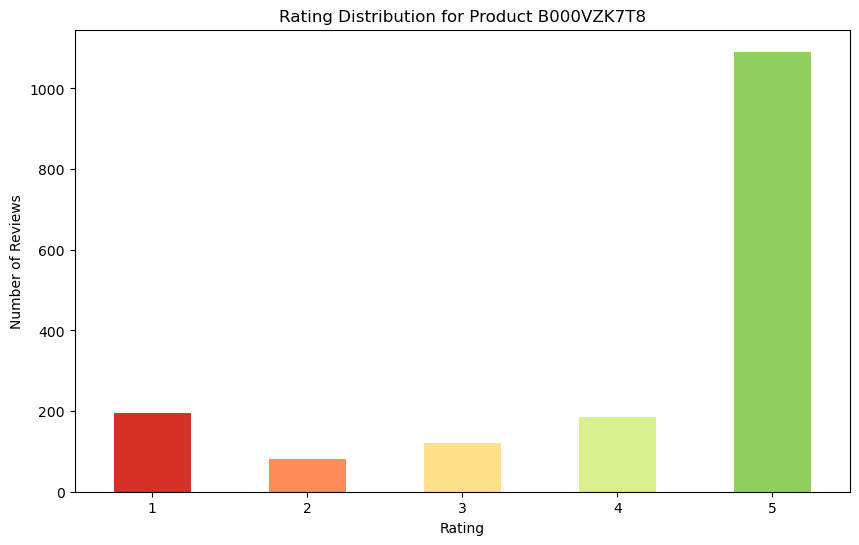

In [126]:
import pandas as pd
import matplotlib.pyplot as plt

# 假设 'overall' 是评分列，'asin' 是商品ID列
# 选择一个你要分析的商品 ASIN
asin_to_plot = 'B000VZK7T8'  # 替换为你想分析的商品ID

# 检查 'overall' 列是否存在
if 'overall' not in reviewdata.columns:
    print("'overall' column not found in the dataset.")
else:
    # 过滤出该商品的评论数据
    product_reviews = reviewdata[reviewdata['asin'] == asin_to_plot]

    # 检查过滤后的数据集是否为空
    if product_reviews.empty:
        print(f"No reviews found for ASIN {asin_to_plot}")
    else:
        # 检查是否存在 `overall` 值
        product_reviews = product_reviews.dropna(subset=['overall'])

        if product_reviews.empty:
            print(f"No valid 'overall' ratings found for ASIN {asin_to_plot}")
        else:
            # 统计不同评分的评论数量
            rating_counts = product_reviews['overall'].value_counts().sort_index()

            if rating_counts.empty:
                print(f"No 'overall' ratings found for ASIN {asin_to_plot}")
            else:
                # 设置颜色映射
                colors = ['#d73027', '#fc8d59', '#fee08b', '#d9ef8b', '#91cf60', '#1a9850']

                # 绘制条形图
                rating_counts.plot(kind='bar', color=colors, figsize=(10, 6))
                plt.xlabel('Rating')
                plt.ylabel('Number of Reviews')
                plt.title(f'Rating Distribution for Product {asin_to_plot}')
                plt.xticks(rotation=0)  # 保持x轴标签的水平显示
                plt.show()